In [1]:
import scipy as scp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cachetools import cached, TTLCache
import re
import csv

In [2]:
## First build dictionary
ens2gene={}
with open ("../data/gencode.v22.annotation.gtf", 'r') as file:
    for line in file:
        matches=re.findall('.*gene_id "(.*?)".*gene_name "(.*?)";',line)
        if matches:
            ens2gene[matches[0][0]]=matches[0][1]


KeyboardInterrupt: 

In [ ]:
ens2gene

In [ ]:
##Replacing ENSEMBLEID with HUGOID
list=[]
index=0
with open('../data/FPKM_data.csv','r') as csv_file:
    csv_reader=csv.reader(csv_file, delimiter=',')
    #Grab header for modified output file
    reader = csv.DictReader(csv_file)
    header = reader.fieldnames
    for row in csv_reader:
        #ENSID=row[index].split('.')[0]
        #row[index]=ENSID
        if row[index] in ens2gene:
            row[index]=ens2gene[row[index]]
            list.append(row)
##convert list of HUGOID rows to a dataframe to be exported into csv named original_filename.csv
df = pd.DataFrame(list,columns=header)

In [ ]:
df

In [16]:
df.to_csv('../data/Hugo_data.csv', index=False)

In [3]:
df = pd.read_csv("../data/Hugo_data.csv")

In [4]:
df

,gene_id,Sample_01,Sample_02,Sample_03,Sample_04,Sample_05,Sample_06,Sample_07,Sample_08,Sample_09,...,Sample_437,Sample_438,Sample_439,Sample_440,Sample_441,Sample_442,Sample_443,Sample_444,Sample_445,Sample_446
0,RP11-368I23.2,0.160576,0.092159,5.1029,0.000000,7.5945,0.099637,0.000000,0.000000,0.000000,...,10.2576,0.000000,5.9366,5.8890,0.000000,6.9453,0.022397,0.031289,0.383024,6.5464
1,RP11-742D12.2,0.000000,0.000000,0.3032,0.004155,0.0140,0.003456,0.008527,0.000000,0.000000,...,0.0849,0.006388,0.0000,0.0385,0.000000,0.0000,0.000000,0.000000,0.010629,0.1049
2,RAB4B,2.176700,3.440321,30.5796,3.364132,57.0500,4.411271,4.444393,4.832063,4.479043,...,40.4087,3.844115,21.3851,26.8799,4.634489,77.9880,4.196655,8.001372,3.937262,26.7882
3,AC104183.2,0.000000,0.000000,3.9154,0.000000,2.9852,0.000000,0.000000,0.000000,0.000000,...,5.8548,0.000000,3.7501,3.9460,0.000000,3.3545,0.000000,0.000000,0.000000,4.8488
4,C12orf5,4.450232,3.928552,1.6419,3.635824,3.7194,2.778901,3.752915,1.896629,3.730292,...,2.5770,2.692415,1.4271,1.3974,2.019223,5.2872,3.171994,3.711136,2.716775,2.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,PPP6R1,15.387652,18.815716,0.0000,11.367612,0.0000,24.866641,13.687676,23.205501,16.367379,...,0.0000,15.675864,0.0000,0.0000,10.817959,0.0000,12.993640,26.504566,12.157695,0.0000
60479,RP4-569M23.2,0.042015,0.090426,0.0000,0.164528,0.0000,0.087988,0.024121,0.085004,0.041837,...,0.0000,0.072277,0.0000,0.0000,0.134483,0.0000,0.087905,0.049122,0.255561,0.0000
60480,AC009260.1,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
60481,BATF3,1.652912,1.507385,0.0000,0.595545,0.0000,0.651880,1.077602,0.558701,3.747388,...,0.0000,1.590395,0.0000,0.0000,1.296166,0.0000,1.201593,2.522055,0.872076,0.0000


In [5]:
#load user input of gene list 
gene_list = open("../data/geneset.txt").read().splitlines()
gene_list

['ABCC6',
 'ABCC8',
 'APPL1',
 'ASXL1',
 'B9D1',
 'B9D2',
 'BICC1',
 'BLK',
 'CASR',
 'CC2D2A',
 'CCND1',
 'CDKN1C',
 'CEL',
 'CEP290',
 'CEP55',
 'CFTR',
 'CNOT1',
 'CP',
 'CPA1',
 'CSPP1',
 'CTRC',
 'DIS3L2',
 'DNAJC21',
 'DYNC2I1',
 'DZIP1L',
 'EFL1',
 'EIF2AK3',
 'ENPP1',
 'FANCD2',
 'FLI1',
 'FLNB',
 'FOXF1',
 'GABRD',
 'GANAB',
 'GATA6',
 'GCK',
 'GLIS3',
 'HNF1A',
 'HNF1B',
 'HNF4A',
 'IGF2',
 'INS',
 'KCNAB2',
 'KCNJ11',
 'KCNQ1',
 'KCNQ1OT1',
 'KLF11',
 'LHX1',
 'MKS1',
 'MYCN',
 'NEK1',
 'NEUROD1',
 'NPHP3',
 'OFD1',
 'PAX4',
 'PDX1',
 'PKD1',
 'PKD2',
 'PKHD1',
 'PRDM16',
 'PRSS1',
 'PRSS2',
 'PTF1A',
 'PTRH2',
 'RARB',
 'RBM8A',
 'RECQL4',
 'RERE',
 'RFX6',
 'RPGRIP1',
 'RPGRIP1L',
 'SBDS',
 'SETBP1',
 'SIK3',
 'SKI',
 'SLC29A3',
 'SPINK1',
 'SRP54',
 'STAT3',
 'STRA6',
 'TCTN2',
 'TELO2',
 'TMEM107',
 'TMEM216',
 'TMEM231',
 'TMEM67',
 'VHL',
 'WDPCP',
 'WDR19',
 'XPNPEP3']

In [251]:
# select genes from database from inputted gene list 
df_selected=df[df['gene_id'].isin(gene_list)]
from scipy.cluster.hierarchy import dendrogram, linkage
df_selected = df_selected.set_index('gene_id')
df_selected=df_selected.astype('float16')
df_selected.info()
#Log Scale the selected data
df_selected = (1+df_selected)/2 # (-1,1] -> (0,1]
df_selected=np.log(df_selected)

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, SPINK1 to FOXF1
Columns: 446 entries, Sample_01 to Sample_446
dtypes: float16(446)
memory usage: 76.5+ KB


In [235]:
covariates=pd.read_csv("../data/covariates.csv")

In [182]:
#Gender covariate
gender=pd.Series(covariates.gender.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=gender, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rb"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [210]:
#Race covariate
race=pd.Series(covariates.race.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=race, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbg"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [232]:
#ethnicity covariate
ethnicity=pd.Series(covariates.ethnicity.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=ethnicity, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rb"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [238]:
#ajcc_pathologic_stage covariate
ajcc_pathologic_stage=pd.Series(covariates.ajcc_pathologic_stage.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=ajcc_pathologic_stage, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgcmykw"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [243]:
#primary_diagnosis covariate
primary_diagnosis=pd.Series(covariates.primary_diagnosis.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=primary_diagnosis, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgcmy"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [248]:
#tissue_or_organ_of_origin covariate
tissue_or_organ_of_origin=pd.Series(covariates.tissue_or_organ_of_origin.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=tissue_or_organ_of_origin, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgcm"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [252]:
#vital_status covariate
vital_status=pd.Series(covariates.vital_status.values,index=covariates["Sample Name"]).to_dict()
df_selected.rename(columns=vital_status, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rb"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [250]:
covariates['vital_status'].value_counts()

Dead     181
Alive    139
Name: vital_status, dtype: int64

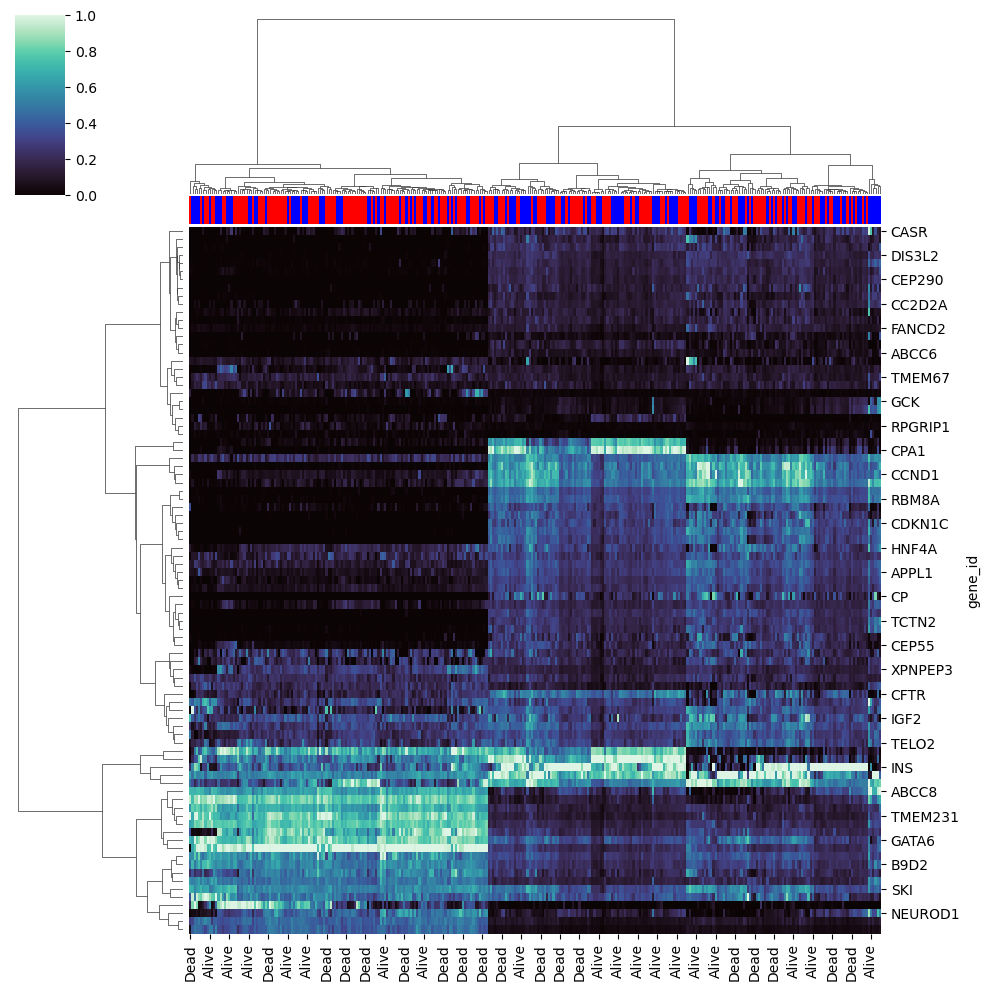

In [253]:
sns.clustermap(df_selected, metric="euclidean", standard_scale=1, method="ward",cmap="mako",col_colors=col_colors)
plt.show()